# Loading and Investigating the data

In [1]:
# import required libraries

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style(style='whitegrid')
plt.style.use('fivethirtyeight')

In [2]:
# Load the dataset

data= pd.read_excel(r'C:\Users\Devi Vara Prasad\Desktop\Innomatics\Projects\California House Prediction\housing_dataset.xlsx')

In [3]:
# understanding the data
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

**There are missing values in column 'total_bedrooms'**

In [6]:
round(100*data.isnull().sum()/len(data),4)

longitude             0.0000
latitude              0.0000
housing_median_age    0.0000
total_rooms           0.0000
total_bedrooms        1.0029
population            0.0000
households            0.0000
median_income         0.0000
ocean_proximity       0.0000
median_house_value    0.0000
dtype: float64

**Percentage of missing values is just 1 % we can drop those rows**

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
data_corr=data.corr()
data_corr.style.background_gradient(cmap='PuBu')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1,-0.924664,-0.108197,0.044568,0.069608,0.0997732,0.0553101,-0.0151759,-0.0459666
latitude,-0.924664,1,0.0111727,-0.0360996,-0.0669828,-0.108785,-0.0710354,-0.0798091,-0.14416
housing_median_age,-0.108197,0.0111727,1,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.0360996,-0.361262,1,0.93038,0.857126,0.918484,0.19805,0.134153
total_bedrooms,0.069608,-0.0669828,-0.320451,0.93038,1,0.877747,0.979728,-0.00772285,0.0496862
population,0.0997732,-0.108785,-0.296244,0.857126,0.877747,1,0.907222,0.00483435,-0.0246497
households,0.0553101,-0.0710354,-0.302916,0.918484,0.979728,0.907222,1,0.0130331,0.0658427
median_income,-0.0151759,-0.0798091,-0.119034,0.19805,-0.00772285,0.00483435,0.0130331,1,0.688075
median_house_value,-0.0459666,-0.14416,0.105623,0.134153,0.0496862,-0.0246497,0.0658427,0.688075,1


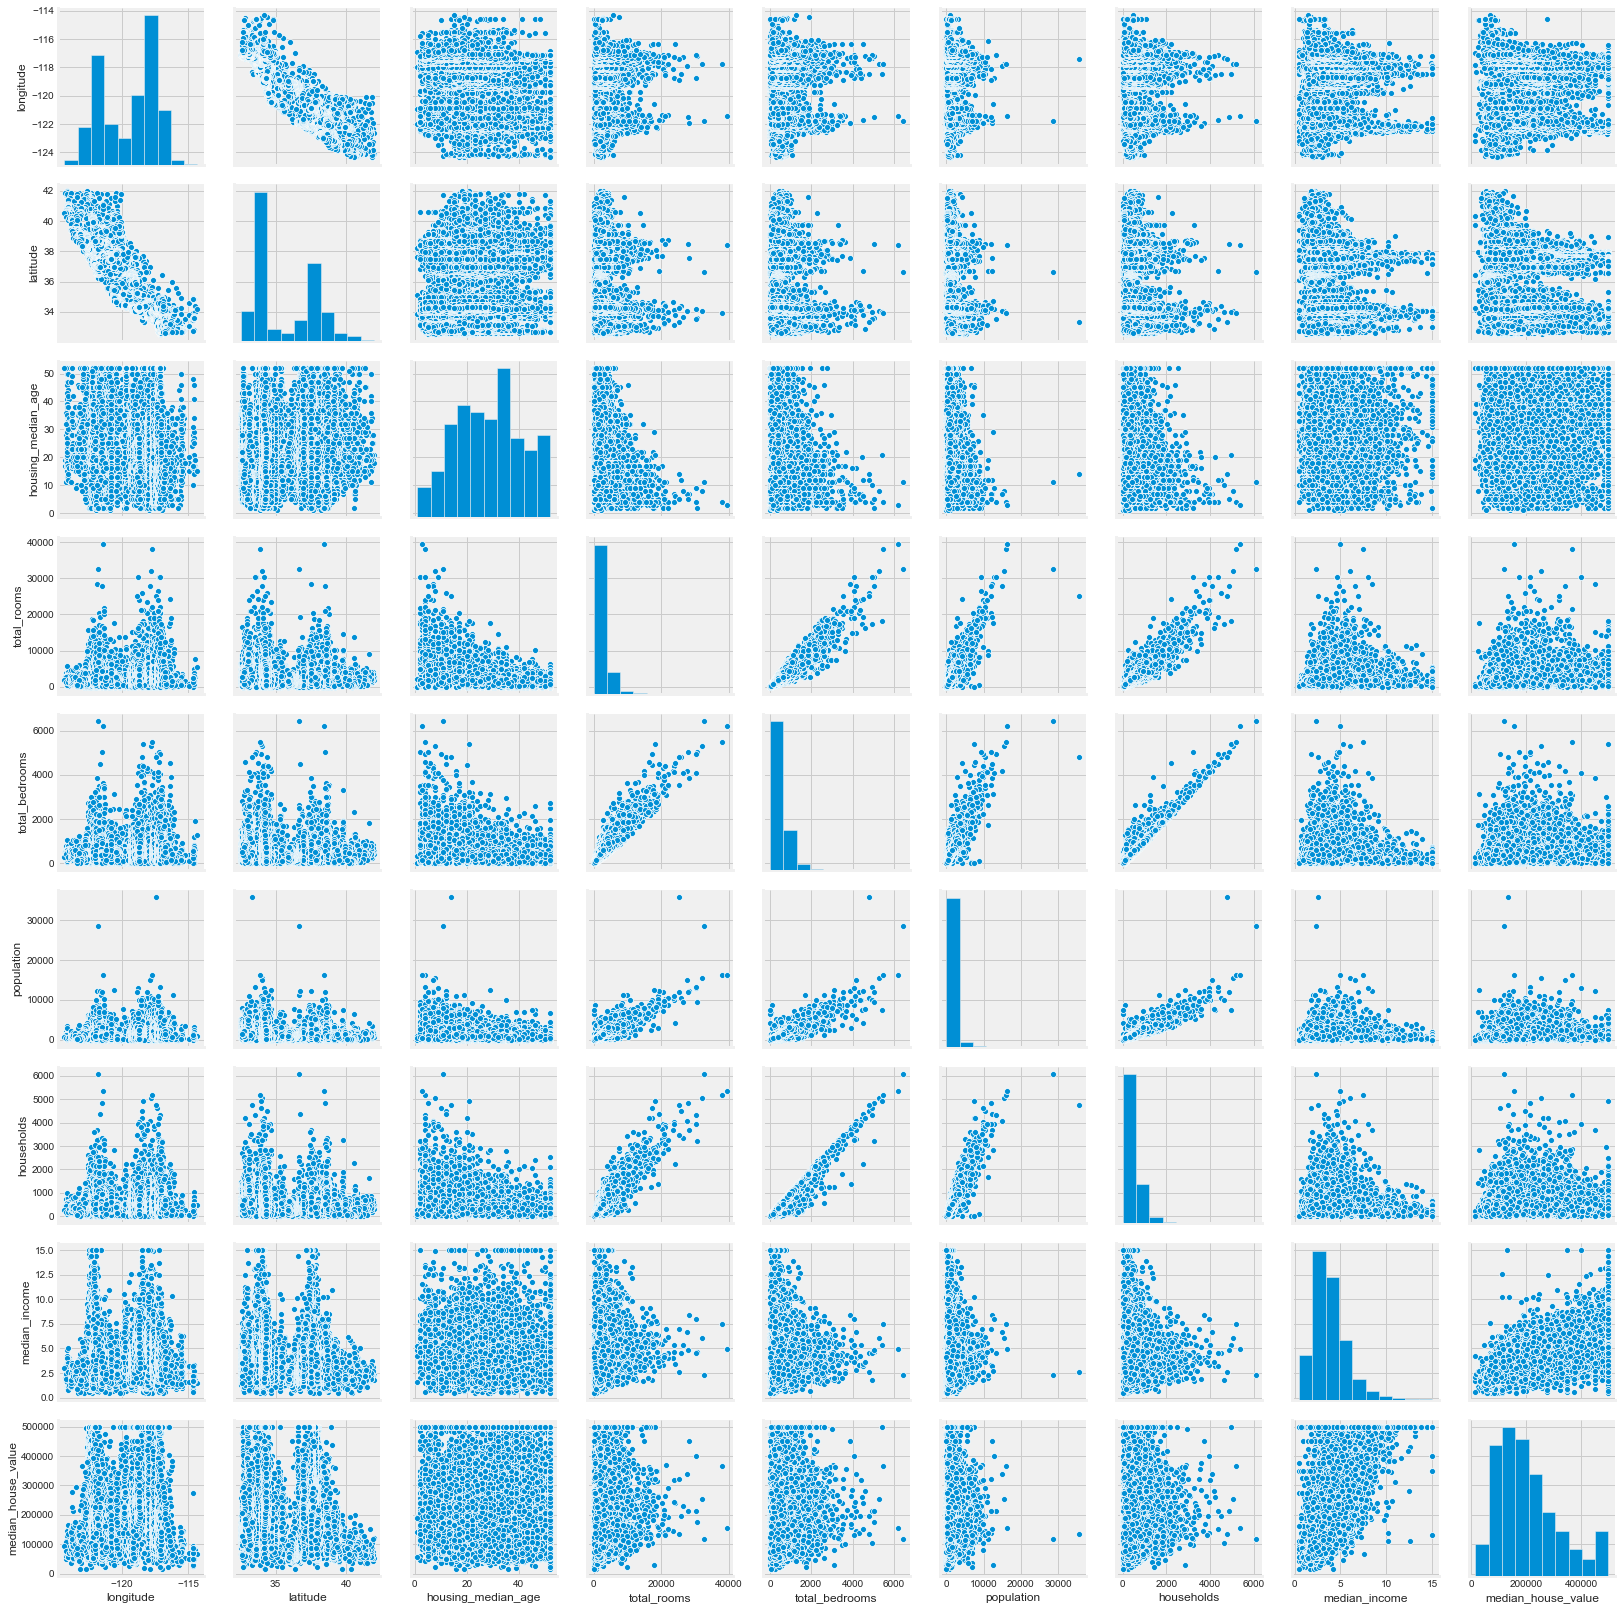

In [9]:
sns.pairplot(data);

- From the correlation matrix we can see that there is strong multicollinearity between population, total_rooms, total_bedrooms and households.
- There is a strong positive correlation between median_income and median_house_value.
- From pairplot we can observe that data is not normally distributed*

# Exploratory Data Analysis

In [10]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

### Categorical Data

### ocean_proximity

In [11]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
list(data.ocean_proximity.value_counts().index)

['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']

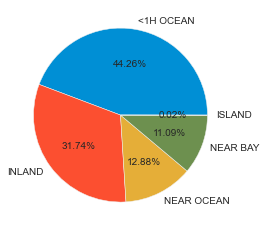

In [13]:
plt.pie(data.ocean_proximity.value_counts(),labels=list(data.ocean_proximity.value_counts().index),autopct='%.2f%%');

### Numerical Data

### longitude

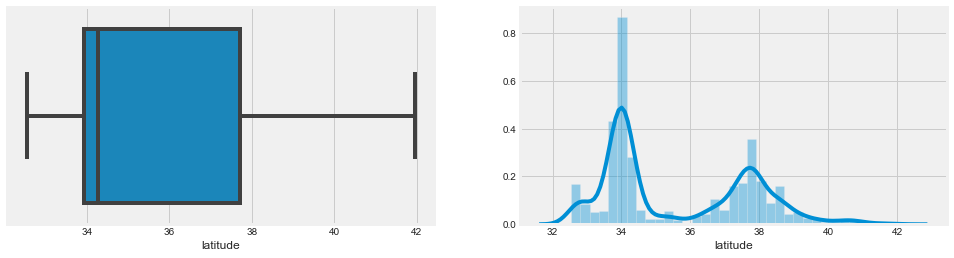

In [14]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.boxplot(data.latitude);

plt.subplot(1,2,2)
sns.distplot(data.latitude)

plt.show();

### latitude

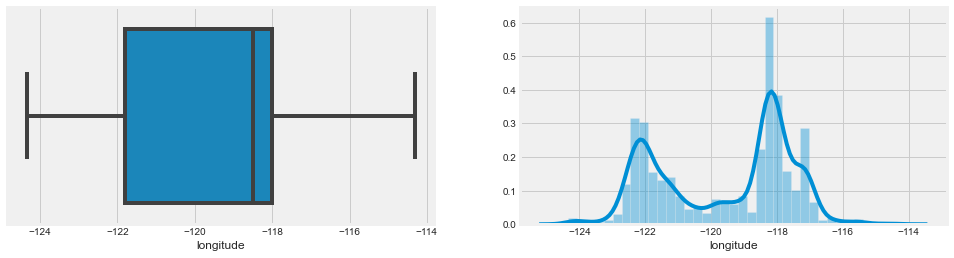

In [15]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.boxplot(data.longitude);

plt.subplot(1,2,2)
sns.distplot(data.longitude)

plt.show();

**There are more number of houses near two locations**

### housing_median_age

In [16]:
data.housing_median_age.mean()

28.639486434108527

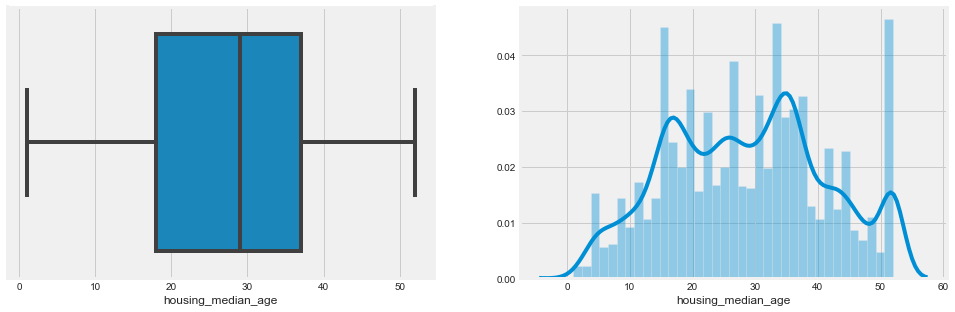

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data.housing_median_age);

plt.subplot(1,2,2)
sns.distplot(data.housing_median_age)

plt.show();

# Data is not normally distributed, there are no outliers 

### total_rooms

In [18]:
data.total_rooms.mean()

2635.7630813953488

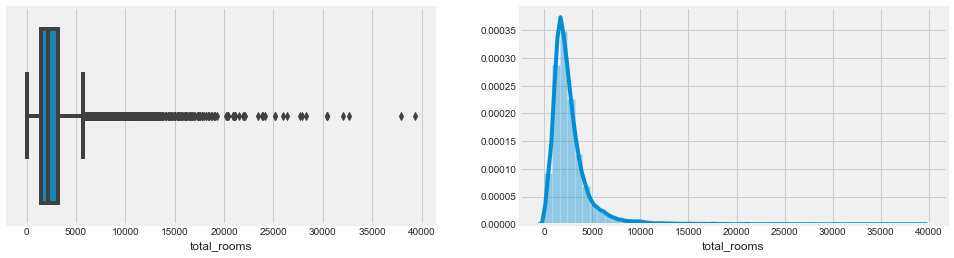

In [19]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.boxplot(data.total_rooms);

plt.subplot(1,2,2)
sns.distplot(data.total_rooms)

plt.show();

# total_rooms in the data set has many outliers 

### total_bedrooms

In [20]:
data.total_bedrooms.mean()

537.8705525375618

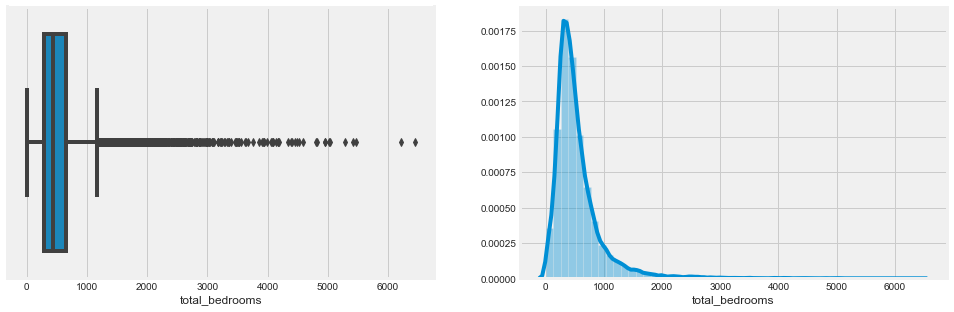

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data.total_bedrooms)

plt.subplot(1,2,2)
sns.distplot(data.total_bedrooms[data.total_bedrooms.notnull()])

plt.show();

# total_bedrooms in the data set has many outliers

### population

In [22]:
data.population.mean()

1425.4767441860465

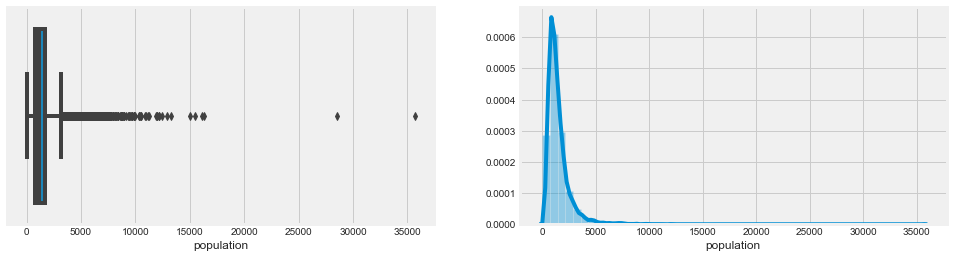

In [23]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.boxplot(data.population);

plt.subplot(1,2,2)
sns.distplot(data.population)

plt.show();

# population in the data set has many outliers 

### households

In [24]:
data.households.mean()

499.5396802325581

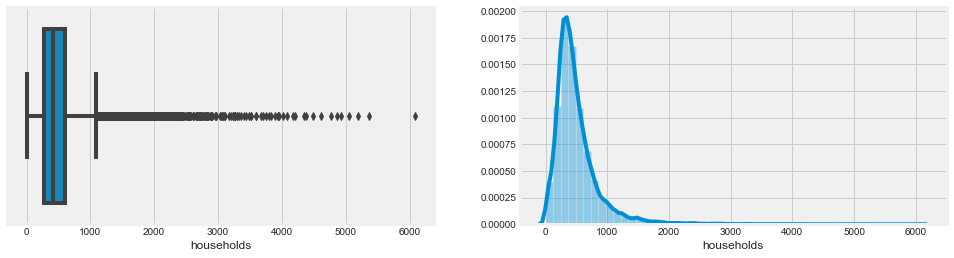

In [25]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.boxplot(data.households);

plt.subplot(1,2,2)
sns.distplot(data.households)

plt.show();

# households in the data set has many outliers 

### median_income

In [26]:
data.median_income.mean()

3.8706710029070246

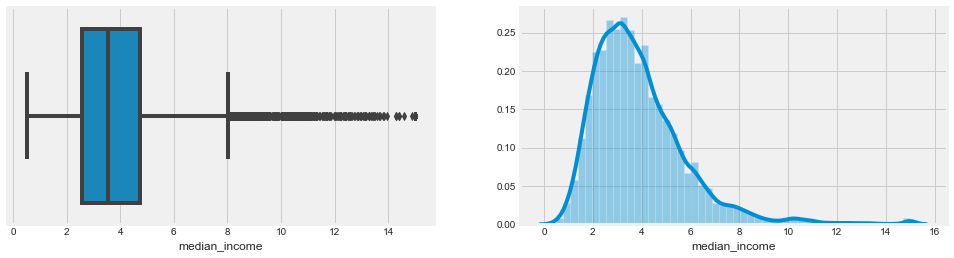

In [27]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.boxplot(data.median_income);

plt.subplot(1,2,2)
sns.distplot(data.median_income)

plt.show();
# median_income in the data set has many outliers 

### median_house_value  ### Target Variable

In [28]:
data.median_house_value.mean()

206855.81690891474

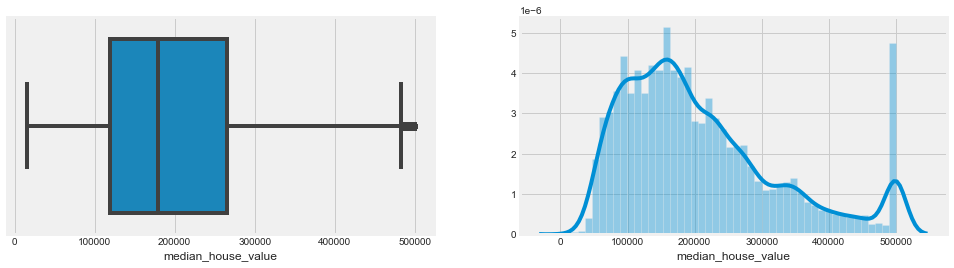

In [29]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.boxplot(data.median_house_value);

plt.subplot(1,2,2)
sns.distplot(data.median_house_value)

plt.show();

### Median income vs Median house value

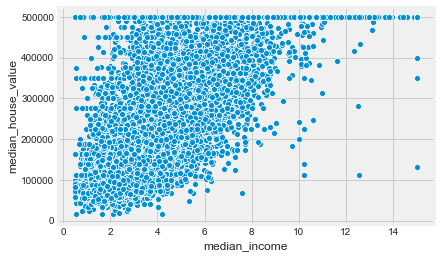

In [30]:
sns.scatterplot(data.median_income ,data.median_house_value);

- There is an expected linear relationship between median income of the household members and median house value.

### Ocean_proximity vs median_house_value

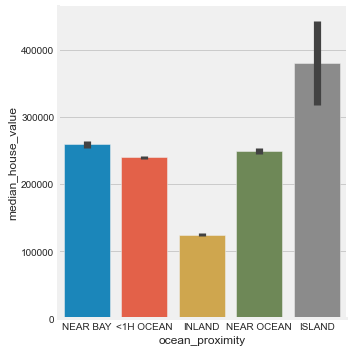

In [31]:
sns.catplot(x="ocean_proximity", y="median_house_value",data = data, kind="bar");

- The houses in Inland has least value and the houses in island has highest value. 
- Rest of the three locations has almost the same value.

## Handling missing values 

- We've missing values in 'total_bedrooms' column as the percetage of missing values is very less, dropping the rows

In [32]:
data[data.total_bedrooms.notnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [33]:
print(list(data[data.total_bedrooms.isnull()].index))

# Indexes of rows with missing values

[290, 341, 538, 563, 696, 738, 1097, 1350, 1456, 1493, 1606, 2028, 2115, 2301, 2323, 2334, 2351, 2412, 2420, 2578, 2608, 2647, 2826, 3024, 3328, 3354, 3376, 3482, 3485, 3529, 3721, 3778, 3912, 3921, 3958, 4043, 4046, 4186, 4279, 4309, 4391, 4447, 4496, 4591, 4600, 4629, 4667, 4691, 4738, 4743, 4744, 4767, 4852, 5059, 5216, 5222, 5236, 5654, 5665, 5678, 5723, 5751, 5990, 6052, 6068, 6220, 6241, 6253, 6298, 6421, 6541, 6590, 6814, 6835, 6962, 7097, 7113, 7168, 7191, 7228, 7316, 7330, 7547, 7654, 7668, 7763, 7806, 8337, 8383, 8530, 8915, 9149, 9571, 9620, 9622, 9814, 9845, 9877, 9942, 9970, 10033, 10216, 10236, 10385, 10389, 10428, 10495, 10761, 10885, 10915, 11096, 11311, 11351, 11441, 11449, 11512, 11741, 12101, 12414, 12570, 12809, 13015, 13069, 13311, 13332, 13336, 13597, 13656, 13706, 13925, 13932, 13933, 14015, 14152, 14173, 14307, 14331, 14386, 14462, 14521, 14641, 14930, 14970, 14986, 15030, 15060, 15118, 15137, 15397, 15479, 15607, 15663, 15890, 15975, 16025, 16038, 16104, 16105,

In [34]:
data.drop(list(data[data.total_bedrooms.isnull()].index),axis=0,inplace=True)

# dropped the rows using index values.

In [35]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [36]:
#### DataSet after dropping the rows with missing values

In [37]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


## Handling Outliers

In [38]:
#skewed_cols=['median_income','households','population','total_bedrooms','total_rooms']

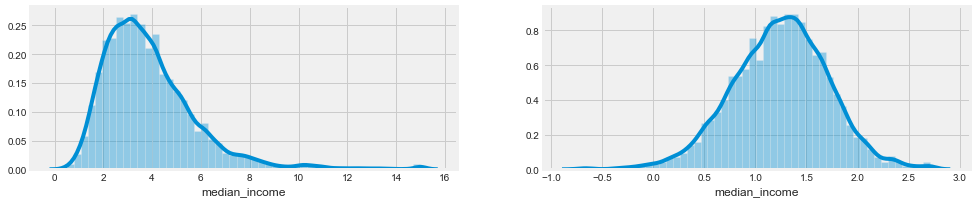

In [39]:
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
sns.distplot(data.median_income);

plt.subplot(1,2,2)
sns.distplot(np.log(data.median_income))

plt.show();

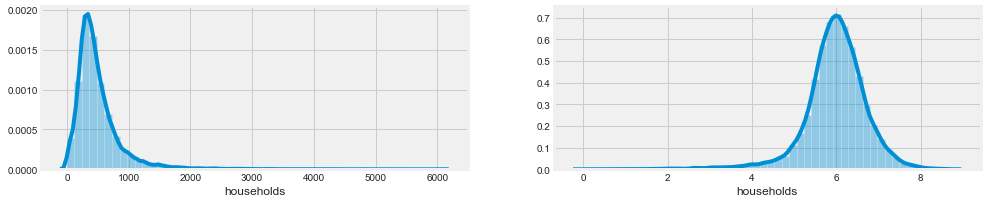

In [40]:
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
sns.distplot(data.households);

plt.subplot(1,2,2)
sns.distplot(np.log(data.households))

plt.show();

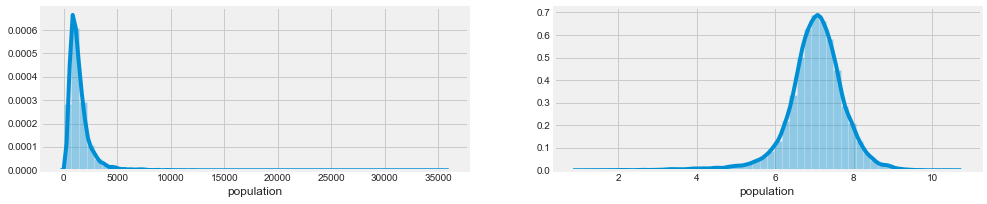

In [41]:
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
sns.distplot(data.population);

plt.subplot(1,2,2)
sns.distplot(np.log(data.population))

plt.show();

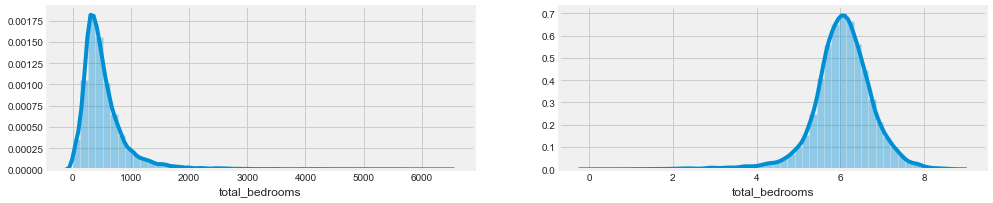

In [42]:
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
sns.distplot(data.total_bedrooms);

plt.subplot(1,2,2)
sns.distplot(np.log(data.total_bedrooms))

plt.show();

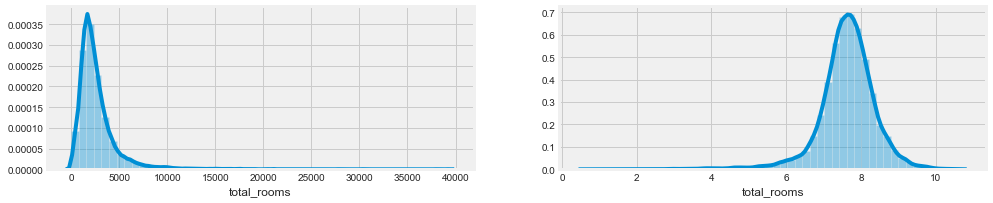

In [43]:
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
sns.distplot(data.total_rooms);

plt.subplot(1,2,2)
sns.distplot(np.log(data.total_rooms))

plt.show();

- After transformation the data is slightly skewed to the left
- Buildling a model with the transformed columns to see the performace
- Outliers should be imputed with the median

In [44]:
# Tranforming the columns with outliers

data['total_rooms_log']=np.log(data.total_rooms)
data['total_bedrooms_log']=np.log(data.total_bedrooms)
data['population_log']=np.log(data.population)
data['households_log']=np.log(data.households)
data['median_income_log']=np.log(data.median_income)

In [45]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,total_rooms_log,total_bedrooms_log,population_log,households_log,median_income_log
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,6.779922,4.859812,5.774552,4.836282,2.119287
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,8.867709,7.008505,7.783641,7.037028,2.116424
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,7.290975,5.247024,6.206576,5.176150,1.982022
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,7.149917,5.459586,6.324359,5.389072,1.730434
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,7.394493,5.634790,6.336826,5.556828,1.347086


**Creating a BackUp**

In [46]:
data_backup=data.copy()

# Model Building

## Using sklearn

In [47]:
# Importing the required libraries the model

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures

In [48]:
# Encode the categorical data

le=LabelEncoder()

data['ocean_proximity']=le.fit_transform(data['ocean_proximity'])

In [49]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', 'total_rooms_log',
       'total_bedrooms_log', 'population_log', 'households_log',
       'median_income_log'],
      dtype='object')

In [50]:
feature_cols=['longitude','latitude', 'housing_median_age', 'total_rooms_log','total_bedrooms_log', 'population_log',
              'households_log','median_income_log','ocean_proximity',]

In [51]:
x=data[feature_cols]
y=data.median_house_value

In [52]:
x

,longitude,latitude,housing_median_age,total_rooms_log,total_bedrooms_log,population_log,households_log,median_income_log,ocean_proximity
0,-122.23,37.88,41,6.779922,4.859812,5.774552,4.836282,2.119287,3
1,-122.22,37.86,21,8.867709,7.008505,7.783641,7.037028,2.116424,3
2,-122.24,37.85,52,7.290975,5.247024,6.206576,5.176150,1.982022,3
3,-122.25,37.85,52,7.149917,5.459586,6.324359,5.389072,1.730434,3
4,-122.25,37.85,52,7.394493,5.634790,6.336826,5.556828,1.347086,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,7.417580,5.924256,6.739337,5.799093,0.444878,1
20636,-121.21,39.49,18,6.546785,5.010635,5.874931,4.736198,0.938756,1
20637,-121.22,39.43,17,7.720462,6.184149,6.914731,6.070738,0.530628,1
20638,-121.32,39.43,18,7.528332,6.013715,6.608001,5.855072,0.624440,1


In [53]:
x.shape
y.shape

(20433, 9)

(20433,)

In [54]:
# Splitting the data

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [55]:
lrm=LinearRegression()

In [56]:
lrm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
lrm.coef_

array([-44146.45739739, -44343.31687222,   1150.33763612, -36807.43246157,
        92398.91169776, -86082.34619623,  31118.0214335 , 159408.98610122,
        -1144.36358621])

In [58]:
lrm.intercept_

-3581762.629001704

In [59]:
lrm_pred=lrm.predict(x_test)

In [60]:
print('R^2 value for LinearRegression model is: ', round(r2_score(y_test,lrm_pred),3)*100)

R^2 value for LinearRegression model is:  60.5


In [61]:
print('RMSE value for LinearRegression model is: ', np.sqrt(mean_squared_error(y_test,lrm_pred)))

RMSE value for LinearRegression model is:  72751.30565957315


- We are getting a R^2 value of 60.5 using sklearn model
- RMSE = 72751.30
- The model is not a good fit for the dataset
- RMSE value is large and the R^2 of the model is less

## Check for multicollinearity
## Feature selection

In [62]:
x.head()

,longitude,latitude,housing_median_age,total_rooms_log,total_bedrooms_log,population_log,households_log,median_income_log,ocean_proximity
0,-122.23,37.88,41,6.779922,4.859812,5.774552,4.836282,2.119287,3
1,-122.22,37.86,21,8.867709,7.008505,7.783641,7.037028,2.116424,3
2,-122.24,37.85,52,7.290975,5.247024,6.206576,5.176150,1.982022,3
3,-122.25,37.85,52,7.149917,5.459586,6.324359,5.389072,1.730434,3
4,-122.25,37.85,52,7.394493,5.634790,6.336826,5.556828,1.347086,3


In [63]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
ss=StandardScaler()

In [65]:
x_ss=ss.fit_transform(x)

In [66]:
pd.DataFrame(x_ss,columns=x.columns).head()

,longitude,latitude,housing_median_age,total_rooms_log,total_bedrooms_log,population_log,households_log,median_income_log,ocean_proximity
0,-1.327314,1.051717,0.982163,-1.129056,-1.625687,-1.691249,-1.560772,1.858507,1.291351
1,-1.322323,1.042355,-0.606210,1.648010,1.306611,1.028830,1.440800,1.852423,1.291351
2,-1.332305,1.037674,1.855769,-0.449280,-1.097264,-1.106337,-1.097230,1.566841,1.291351
3,-1.337296,1.037674,1.855769,-0.636908,-0.807183,-0.946872,-0.806829,1.032259,1.291351
4,-1.337296,1.037674,1.855769,-0.311585,-0.568084,-0.929993,-0.578028,0.217710,1.291351


In [67]:
vif=pd.DataFrame()
vif['Variables']=x.columns
vif

,Variables
0,longitude
1,latitude
2,housing_median_age
3,total_rooms_log
4,total_bedrooms_log
5,population_log
6,households_log
7,median_income_log
8,ocean_proximity


In [68]:
vif['VIF factor']= [variance_inflation_factor(x_ss, exog_idx=i) for i in range(9)]

In [69]:
vif

,Variables,VIF factor
0,longitude,10.371966
1,latitude,10.519038
2,housing_median_age,1.234015
3,total_rooms_log,25.066680
4,total_bedrooms_log,39.046288
5,population_log,8.366221
6,households_log,33.040223
7,median_income_log,2.796020
8,ocean_proximity,1.173952


- There is a high multicollinearity between total_bedrooms_log and household_log
- Removing total_bedrooms_log from the data set 

In [70]:
feature_cols=['longitude','latitude', 'housing_median_age', 'total_rooms_log', 'population_log',
              'households_log','median_income_log','ocean_proximity',]

In [71]:
x=data[feature_cols]
y=data.median_house_value

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [73]:
x_ss=ss.fit_transform(x)

In [74]:
pd.DataFrame(x_ss,columns=x.columns).head()

,longitude,latitude,housing_median_age,total_rooms_log,population_log,households_log,median_income_log,ocean_proximity
0,-1.327314,1.051717,0.982163,-1.129056,-1.691249,-1.560772,1.858507,1.291351
1,-1.322323,1.042355,-0.606210,1.648010,1.028830,1.440800,1.852423,1.291351
2,-1.332305,1.037674,1.855769,-0.449280,-1.106337,-1.097230,1.566841,1.291351
3,-1.337296,1.037674,1.855769,-0.636908,-0.946872,-0.806829,1.032259,1.291351
4,-1.337296,1.037674,1.855769,-0.311585,-0.929993,-0.578028,0.217710,1.291351


In [75]:
vif=pd.DataFrame()
vif['Variables']=x.columns
vif

,Variables
0,longitude
1,latitude
2,housing_median_age
3,total_rooms_log
4,population_log
5,households_log
6,median_income_log
7,ocean_proximity


In [76]:
vif['VIF factor']= [variance_inflation_factor(x_ss, exog_idx=i) for i in range(8)]

In [77]:
vif

,Variables,VIF factor
0,longitude,10.336356
1,latitude,10.410880
2,housing_median_age,1.226763
3,total_rooms_log,14.457300
4,population_log,8.032263
5,households_log,20.007397
6,median_income_log,1.954583
7,ocean_proximity,1.173713


- There is a high multicollinearity between households_log and totalrooms_log
- Removing households_log from the data set 

In [78]:
feature_cols=['longitude','latitude', 'housing_median_age', 'total_rooms_log', 'population_log'
              ,'median_income_log','ocean_proximity',]

In [79]:
x=data[feature_cols]
y=data.median_house_value

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [81]:
x_ss=ss.fit_transform(x_train)

In [82]:
pd.DataFrame(x_ss,columns=x.columns).head()

,longitude,latitude,housing_median_age,total_rooms_log,population_log,median_income_log,ocean_proximity
0,-1.146538,0.447129,-0.684683,1.499423,1.179924,1.077738,-0.822493
1,0.854610,-0.836165,-0.922759,0.422082,0.266084,0.852231,-0.822493
2,0.580139,-0.686291,0.426338,0.328098,0.026081,0.456347,-0.822493
3,1.208928,-1.346672,-0.129172,-0.382408,-0.340809,-0.768493,1.988863
4,0.565167,-0.770595,-0.764041,1.865333,1.306952,1.651949,-0.822493


In [83]:
vif=pd.DataFrame()
vif['Variables']=x.columns
vif

,Variables
0,longitude
1,latitude
2,housing_median_age
3,total_rooms_log
4,population_log
5,median_income_log
6,ocean_proximity


In [84]:
vif['VIF factor']= [variance_inflation_factor(x_ss, exog_idx=i) for i in range(7)]

In [85]:
vif

,Variables,VIF factor
0,longitude,9.367482
1,latitude,9.312680
2,housing_median_age,1.224463
3,total_rooms_log,5.554730
4,population_log,5.205156
5,median_income_log,1.492851
6,ocean_proximity,1.174765


- Building a model with above features

## Linear Regression Model after feature selection

In [86]:
feature_cols=['longitude','latitude', 'housing_median_age', 'total_rooms_log', 'population_log'
              ,'median_income_log','ocean_proximity']

In [87]:
x=data[feature_cols]
y=data.median_house_value

In [88]:
x

,longitude,latitude,housing_median_age,total_rooms_log,population_log,median_income_log,ocean_proximity
0,-122.23,37.88,41,6.779922,5.774552,2.119287,3
1,-122.22,37.86,21,8.867709,7.783641,2.116424,3
2,-122.24,37.85,52,7.290975,6.206576,1.982022,3
3,-122.25,37.85,52,7.149917,6.324359,1.730434,3
4,-122.25,37.85,52,7.394493,6.336826,1.347086,3
...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,7.417580,6.739337,0.444878,1
20636,-121.21,39.49,18,6.546785,5.874931,0.938756,1
20637,-121.22,39.43,17,7.720462,6.914731,0.530628,1
20638,-121.32,39.43,18,7.528332,6.608001,0.624440,1


In [89]:
x.shape
y.shape

(20433, 7)

(20433,)

In [90]:
# Splitting the data

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [91]:
lrm1=LinearRegression()

In [92]:
lrm1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
lrm1.coef_

array([-52324.33241823, -53141.3050321 ,   1126.1185196 ,  65284.2473885 ,
       -64818.18544051, 117645.40848622,  -1276.74541252])

In [94]:
lrm1.intercept_

-4376244.995238884

In [95]:
lrm1_pred=lrm1.predict(x_test)

In [96]:
print('R^2 value for LinearRegression model is: ', round(r2_score(y_test,lrm1_pred),3)*100)

R^2 value for LinearRegression model is:  57.8


In [97]:
print('RMSE value for LinearRegression model is: ', np.sqrt(mean_squared_error(y_test,lrm_pred)))

RMSE value for LinearRegression model is:  72751.30565957315


- We are getting a R^2 value of 57.8 using sklearn model
- RMSE = 72751.30
- The model is not a good fit for the dataset
- RMSE value is large and the R^2 of the model is less

## Polynomial regression model with all features

In [98]:
feature_cols=['longitude','latitude', 'housing_median_age', 'total_rooms_log','total_bedrooms_log', 'population_log',
              'households_log','median_income_log','ocean_proximity',]

In [99]:
x=data[feature_cols]
y=data.median_house_value

In [100]:
x

,longitude,latitude,housing_median_age,total_rooms_log,total_bedrooms_log,population_log,households_log,median_income_log,ocean_proximity
0,-122.23,37.88,41,6.779922,4.859812,5.774552,4.836282,2.119287,3
1,-122.22,37.86,21,8.867709,7.008505,7.783641,7.037028,2.116424,3
2,-122.24,37.85,52,7.290975,5.247024,6.206576,5.176150,1.982022,3
3,-122.25,37.85,52,7.149917,5.459586,6.324359,5.389072,1.730434,3
4,-122.25,37.85,52,7.394493,5.634790,6.336826,5.556828,1.347086,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,7.417580,5.924256,6.739337,5.799093,0.444878,1
20636,-121.21,39.49,18,6.546785,5.010635,5.874931,4.736198,0.938756,1
20637,-121.22,39.43,17,7.720462,6.184149,6.914731,6.070738,0.530628,1
20638,-121.32,39.43,18,7.528332,6.013715,6.608001,5.855072,0.624440,1


In [101]:
x.shape
y.shape

(20433, 9)

(20433,)

In [102]:
# Splitting the data

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [103]:
poly_reg = PolynomialFeatures(degree=2)

In [104]:
x_train_poly = poly_reg.fit_transform(x_train)

In [105]:
prm=LinearRegression()

In [106]:
prm.fit(x_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
y_train_pred = prm.predict(x_train_poly)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
Rsq_train = r2_score(y_train, y_train_pred)

In [108]:
print("Evaluation metrics for Training dataset")
print('RMSE is: ', np.round(rmse_train,3))
print('R-Squared is: ',str(np.round(Rsq_train*100,2)) + '%' )

Evaluation metrics for Training dataset
RMSE is:  59628.2
R-Squared is:  73.24%


In [109]:
x_test_poly = poly_reg.fit_transform(x_test)
y_test_pred = prm.predict(x_test_poly)
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
Rsq_test = r2_score(y_test, y_test_pred)

In [110]:
print("Evaluation metrics for Testing dataset")
print('RMSE is: ', np.round(rmse_test,3))
print('R-Squared is: ',str(np.round(Rsq_test*100,2)) + '%'  )

Evaluation metrics for Testing dataset
RMSE is:  60464.237
R-Squared is:  72.74%


In [111]:
# Function to evalute the regression model
def polynomial_regression_model(degree, X_train, Y_train, X_test, Y_test):
    
    poly_reg = PolynomialFeatures(degree=degree)
    X_train_poly = poly_reg.fit_transform(X_train)
    prm = LinearRegression()
    prm.fit(X_train_poly, Y_train)    
        
    # model evaluation on training dataset
    Y_train_pred = prm.predict(X_train_poly)
    rmse_train = np.sqrt(mean_squared_error(Y_train,Y_train_pred))
    Rsq_train = r2_score(Y_train, Y_train_pred)


    print("Evaluation metrics for Training dataset")
    print("-"*50)
    print('RMSE is: ', np.round(rmse_train,3))
    print('R-Squared is: ',str(np.round(Rsq_train*100,2)) + '%' )

    # model evaluation on test dataset
    X_test_poly = poly_reg.fit_transform(X_test)
    Y_test_pred = prm.predict(X_test_poly)
    rmse_test = np.sqrt(mean_squared_error(Y_test,Y_test_pred))
    Rsq_test = r2_score(Y_test, Y_test_pred)

    print('\n')

    print("Evaluation metrics for Testing dataset")
    print("-"*50)
    print('RMSE is: ', np.round(rmse_test,3))
    print('R-Squared is: ',str(np.round(Rsq_test*100,2)) + '%'  )

In [112]:
polynomial_regression_model(3, x_train, y_train, x_test, y_test)

Evaluation metrics for Training dataset
--------------------------------------------------
RMSE is:  55481.561
R-Squared is:  76.83%


Evaluation metrics for Testing dataset
--------------------------------------------------
RMSE is:  60552.343
R-Squared is:  72.66%


In [113]:
polynomial_regression_model(4, x_train, y_train, x_test, y_test)

Evaluation metrics for Training dataset
--------------------------------------------------
RMSE is:  48851.497
R-Squared is:  82.04%


Evaluation metrics for Testing dataset
--------------------------------------------------
RMSE is:  104966.427
R-Squared is:  17.84%


- We've built multiple models using polynomial regression
- Polynomial regression with degree 2 has the best accuracy

## Polynomial regression model with selected features


In [114]:
feature_cols=['longitude','latitude', 'housing_median_age', 'total_rooms_log', 'population_log'
              ,'median_income_log','ocean_proximity']

In [115]:
x=data[feature_cols]
y=data.median_house_value

In [116]:
x

,longitude,latitude,housing_median_age,total_rooms_log,population_log,median_income_log,ocean_proximity
0,-122.23,37.88,41,6.779922,5.774552,2.119287,3
1,-122.22,37.86,21,8.867709,7.783641,2.116424,3
2,-122.24,37.85,52,7.290975,6.206576,1.982022,3
3,-122.25,37.85,52,7.149917,6.324359,1.730434,3
4,-122.25,37.85,52,7.394493,6.336826,1.347086,3
...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,7.417580,6.739337,0.444878,1
20636,-121.21,39.49,18,6.546785,5.874931,0.938756,1
20637,-121.22,39.43,17,7.720462,6.914731,0.530628,1
20638,-121.32,39.43,18,7.528332,6.608001,0.624440,1


In [117]:
x.shape
y.shape

(20433, 7)

(20433,)

In [118]:
# Splitting the data

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [119]:
# Function to evalute the regression model
def polynomial_regression_model(degree, X_train, Y_train, X_test, Y_test):
    
    poly_reg = PolynomialFeatures(degree=degree)
    X_train_poly = poly_reg.fit_transform(X_train)
    prm = LinearRegression()
    prm.fit(X_train_poly, Y_train)    
        
    # model evaluation on training dataset
    Y_train_pred = prm.predict(X_train_poly)
    rmse_train = np.sqrt(mean_squared_error(Y_train,Y_train_pred))
    Rsq_train = r2_score(Y_train, Y_train_pred)


    print("Evaluation metrics for Training dataset")
    print("-"*50)
    print('RMSE is: ', np.round(rmse_train,3))
    print('R-Squared is: ',str(np.round(Rsq_train*100,2)) + '%' )

    # model evaluation on test dataset
    X_test_poly = poly_reg.fit_transform(X_test)
    Y_test_pred = prm.predict(X_test_poly)
    rmse_test = np.sqrt(mean_squared_error(Y_test,Y_test_pred))
    Rsq_test = r2_score(Y_test, Y_test_pred)

    print('\n')

    print("Evaluation metrics for Testing dataset")
    print("-"*50)
    print('RMSE is: ', np.round(rmse_test,3))
    print('R-Squared is: ',str(np.round(Rsq_test*100,2)) + '%'  )

In [120]:
polynomial_regression_model(2, x_train, y_train, x_test, y_test)

Evaluation metrics for Training dataset
--------------------------------------------------
RMSE is:  64535.942
R-Squared is:  68.65%


Evaluation metrics for Testing dataset
--------------------------------------------------
RMSE is:  65759.826
R-Squared is:  67.75%


In [121]:
polynomial_regression_model(3, x_train, y_train, x_test, y_test)

Evaluation metrics for Training dataset
--------------------------------------------------
RMSE is:  61337.213
R-Squared is:  71.68%


Evaluation metrics for Testing dataset
--------------------------------------------------
RMSE is:  63449.789
R-Squared is:  69.98%


- There is no significant imporvement in the model with selected features

# Decision Tree Regression

In [122]:
from sklearn.tree import DecisionTreeRegressor

In [123]:
dt = DecisionTreeRegressor()

In [124]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', 'total_rooms_log',
       'total_bedrooms_log', 'population_log', 'households_log',
       'median_income_log'],
      dtype='object')

In [125]:
dt_features=  ['longitude', 'latitude', 'housing_median_age','total_rooms_log',
       'total_bedrooms_log', 'population_log', 'households_log',
       'median_income_log','ocean_proximity']


dt_x=data[dt_features]
dt_y=data.median_house_value

In [126]:
dtx_train, dtx_test, dty_train, dty_test = train_test_split(dt_x,dt_y,test_size=0.3,random_state=0)

In [127]:
dt.fit(dtx_train,dty_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [128]:
dt_pred=dt.predict(dtx_test)

In [129]:
r2_score(dty_test,dt_pred)

0.63408183309241

In [130]:
np.sqrt(mean_squared_error(dty_test,dt_pred))

70051.49809108803

## Model with Random Forest

In [156]:
from sklearn.ensemble import RandomForestRegressor

In [159]:
rf=RandomForestRegressor()

In [161]:
rf.fit(dtx_train,dty_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [162]:
y_train_pred = rf.predict(dtx_train)

y_test_pred = rf.predict(dtx_test)

In [164]:
r2_score(y_train,y_train_pred)
r2_score(y_test,y_test_pred)

0.9619450304317088

0.7923517571277137

In [166]:
rf.feature_importances_

array([0.10780471, 0.10797954, 0.06109458, 0.02489032, 0.02452921,
       0.03319993, 0.01949329, 0.51951317, 0.10149524])

In [167]:
f_imp = rf.feature_importances_

In [169]:
np.argsort(rf.feature_importances_)

array([6, 4, 3, 5, 2, 8, 0, 1, 7], dtype=int64)

In [173]:
sorted_idx = np.argsort(rf.feature_importances_)

In [174]:
dtx_train.columns[sorted_idx]

Index(['households_log', 'total_bedrooms_log', 'total_rooms_log',
       'population_log', 'housing_median_age', 'ocean_proximity', 'longitude',
       'latitude', 'median_income_log'],
      dtype='object')

In [176]:
f_imp[sorted_idx]

array([0.01949329, 0.02452921, 0.02489032, 0.03319993, 0.06109458,
       0.10149524, 0.10780471, 0.10797954, 0.51951317])

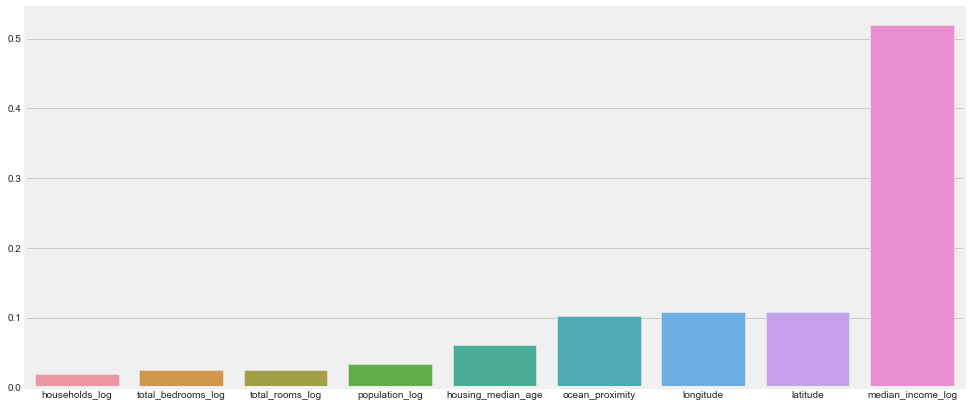

In [177]:
plt.figure(figsize=(15,7))
sns.barplot(x = dtx_train.columns[sorted_idx], y = f_imp[sorted_idx])
plt.show();

In [178]:
features_selected= ['housing_median_age', 'ocean_proximity', 'longitude',
       'latitude', 'median_income_log']
# Selecting features that are having high importance

In [180]:
xrf=data[features_selected]
yrf=data.median_house_value

In [181]:
xrf_train, xrf_test, yrf_train, yrf_test = train_test_split(xrf,yrf, test_size = 0.3, random_state = 0)

In [182]:
rf1 = RandomForestRegressor()

In [183]:
rf1.fit(xrf_train, yrf_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [184]:
yrf_train_pred1 = rf1.predict(xrf_train)

yrf_test_pred1 = rf1.predict(xrf_test)

In [186]:
r2_score(yrf_train,yrf_train_pred1)
r2_score(yrf_test,yrf_test_pred1)

0.9646973405709742

0.7911217410857818

In [188]:
np.sqrt(mean_squared_error(yrf_test,yrf_test_pred1))

52926.36419693928

### Hyper-Parameter tuning

In [216]:
from sklearn.model_selection import GridSearchCV

In [217]:
pram_grid = {'n_estimators' : [20,50,100],
            'max_features':[1,2,3]}

In [218]:
model = RandomForestRegressor()

In [219]:
grid_results = GridSearchCV(model, pram_grid, cv = 5)

In [220]:
grid_results.fit(xrf_train.values, yrf_train.values)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_features': [1, 2, 3],
    

In [221]:
grid_results.best_score_

0.8219670625468127

In [222]:
grid_results.best_params_

{'max_features': 2, 'n_estimators': 100}

In [223]:
grid_results.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [228]:
rf2=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [229]:
rf2.fit(xrf_train, yrf_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [231]:
yrf_train_pred2 = rf2.predict(xrf_train)

yrf_test_pred2 = rf2.predict(xrf_test)

In [232]:
r2_score(yrf_train,yrf_train_pred2)
r2_score(yrf_test,yrf_test_pred2)

0.9756127971275509

0.8274745771929304

In [233]:
np.sqrt(mean_squared_error(yrf_test,yrf_test_pred1))

52926.36419693928

- Random Forest model is giving the highest r2 value(0.8274745771929304) of all the models.
- Selecting it as the best predictor for dataset.

## LinearRegression model with median_income

In [196]:
from sklearn.linear_model import LinearRegression

In [197]:
lru=LinearRegression()

In [204]:
xl=data.median_income.values.reshape(-1,1)
yl=data.median_house_value

In [205]:
xl_train, xl_test, yl_train, yl_test = train_test_split(xl,yl, test_size = 0.3, random_state = 0)

In [206]:
lru.fit(xl_train,yl_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [207]:
lru_pred=lru.predict(xl_test)

In [208]:
print('R^2 value for LinearRegression model is: ', round(r2_score(yl_test,lru_pred),3)*100)

R^2 value for LinearRegression model is:  47.4


In [209]:
print('RMSE value for LinearRegression model is: ', np.sqrt(mean_squared_error(yl_test,lru_pred)))

RMSE value for LinearRegression model is:  84016.83919554015


**_From the above models build on dataset, selecting RandomForest as the best predictor with max_features': 2, 'n_estimators': 100_**

# END

# Other models build for testing

### Model Using OLS method with all features

In [131]:
import statsmodels.api as sm

In [132]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', 'total_rooms_log',
       'total_bedrooms_log', 'population_log', 'households_log',
       'median_income_log'],
      dtype='object')

In [133]:
ols_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
              'households', 'median_income','ocean_proximity']


ols_x=data[ols_features]
ols_y=data.median_house_value

In [134]:
ols_x_train, ols_x_test, ols_y_train, ols_y_test = train_test_split(ols_x,ols_y,test_size=0.3,random_state=0)

In [135]:
olsmodel1= sm.OLS(ols_y_train, ols_x_train).fit()

In [136]:
olsmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                          1.435e+04
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        13:35:18   Log-Likelihood:                     -1.8078e+05
No. Observations:               14303   AIC:                                  3.616e+05
Df Residuals:                   14294   BIC:                                  3.616e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
longitude          -2391.6973    130.054    -18.390      0.000   -2646.620   -2136.775
latitude           -9036.8591    413.586    -21.850      0.000   -9847.542   -8226.176
housing_median_age  1699.8653     54.119     31.410      0.000    1593.785    1805.945
total_rooms          -14.7393      1.003    -14.695      0.000     -16.705     -12.773
total_bedrooms        76.1516      8.936      8.521      0.000      58.635      93.668
population           -35.5379      1.345    -26.417      0.000     -38.175     -32.901
households           121.1593      9.568     12.663      0.000     102.405     139.914
median_income       4.525e+04    413.807    109.341      0.000    4.44e+04    4.61e+04
ocean_proximity     5851.2709    450.734     12.982      0.000    4967.774    6734.768
==============================================================================
Omnibus:                     3039.202   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9544.532
Skew:                           1.086   Prob(JB):                         0.00
Kurtosis:                       6.361   Cond. No.                     3.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
olsmodel1.params

longitude             -2391.697342
latitude              -9036.859143
housing_median_age     1699.865319
total_rooms             -14.739286
total_bedrooms           76.151557
population              -35.537866
households              121.159346
median_income         45246.126295
ocean_proximity        5851.270919
dtype: float64

In [138]:
ols_pred=olsmodel1.predict(ols_x_test)

In [139]:
np.sqrt(mean_squared_error(ols_y_test,ols_pred))

74059.360195412

In [140]:
olsmodel1.resid.sum().round(5)

-2833928.48689

In [141]:
import lmdiag

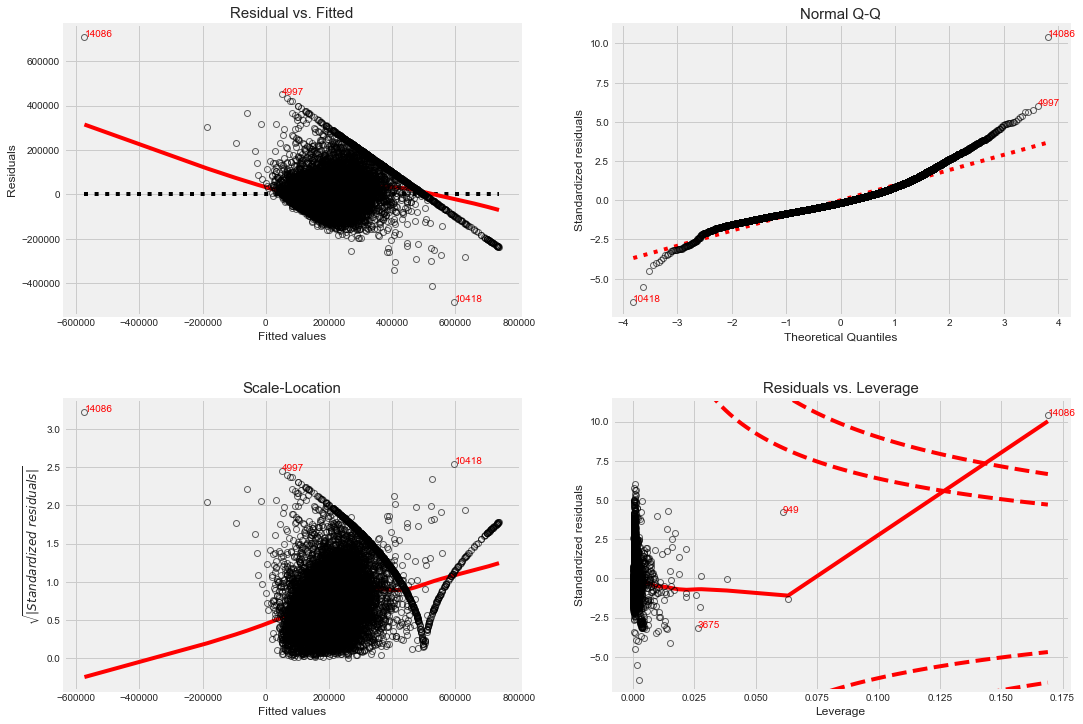

In [154]:
#plt.figure(figsize=(15,10))
#lmdiag.plot(olsmodel1);

# Model without applying log transformation on columns with outliers

In [143]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', 'total_rooms_log',
       'total_bedrooms_log', 'population_log', 'households_log',
       'median_income_log'],
      dtype='object')

In [144]:
feature_col=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']

In [145]:
X=data[feature_col]
Y=data.median_house_value
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,1
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,1
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,1


In [146]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [147]:
# importing libraries required for the model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures

In [148]:
# fitting the model

In [149]:
# Function to evalute the regression model
def polynomial_regression_model(degree, X_train, Y_train, X_test, Y_test):
    
    poly_reg = PolynomialFeatures(degree=degree)
    X_train_poly = poly_reg.fit_transform(X_train)
    prm = LinearRegression()
    prm.fit(X_train_poly, Y_train)    
        
    # model evaluation on training dataset
    Y_train_pred = prm.predict(X_train_poly)
    rmse_train = np.sqrt(mean_squared_error(Y_train,Y_train_pred))
    Rsq_train = r2_score(Y_train, Y_train_pred)


    print("Evaluation metrics for Training dataset")
    print("-"*50)
    print('RMSE is: ', np.round(rmse_train,3))
    print('R-Squared is: ',str(np.round(Rsq_train*100,2)) + '%' )

    # model evaluation on test dataset
    X_test_poly = poly_reg.fit_transform(X_test)
    Y_test_pred = prm.predict(X_test_poly)
    rmse_test = np.sqrt(mean_squared_error(Y_test,Y_test_pred))
    Rsq_test = r2_score(Y_test, Y_test_pred)

    print('\n')

    print("Evaluation metrics for Testing dataset")
    print("-"*50)
    print('RMSE is: ', np.round(rmse_test,3))
    print('R-Squared is: ',str(np.round(Rsq_test*100,2)) + '%'  )

In [150]:
polynomial_regression_model(1, X_train, Y_train, X_test, Y_test)

Evaluation metrics for Training dataset
--------------------------------------------------
RMSE is:  69631.943
R-Squared is:  63.51%


Evaluation metrics for Testing dataset
--------------------------------------------------
RMSE is:  69448.471
R-Squared is:  64.04%


In [151]:
polynomial_regression_model(2, X_train, Y_train, X_test, Y_test)

Evaluation metrics for Training dataset
--------------------------------------------------
RMSE is:  62706.541
R-Squared is:  70.41%


Evaluation metrics for Testing dataset
--------------------------------------------------
RMSE is:  63485.447
R-Squared is:  69.95%


In [152]:
polynomial_regression_model(3, X_train, Y_train, X_test, Y_test)

Evaluation metrics for Training dataset
--------------------------------------------------
RMSE is:  57274.807
R-Squared is:  75.31%


Evaluation metrics for Testing dataset
--------------------------------------------------
RMSE is:  62416.512
R-Squared is:  70.95%


In [153]:
polynomial_regression_model(4, X_train, Y_train, X_test, Y_test)

Evaluation metrics for Training dataset
--------------------------------------------------
RMSE is:  59046.826
R-Squared is:  73.76%


Evaluation metrics for Testing dataset
--------------------------------------------------
RMSE is:  268022.156
R-Squared is:  -435.66%
